In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Titanic-Dataset.csv')

# Displaying first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:

df.info()

#Printing missing values to check for null values
print("\nMissing Values:\n")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         

In [10]:
# Dropping cabin due to lot of null values
df.drop('Cabin', axis=1, inplace=True)

# Filled missing Age values with Median Age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with Mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-4032080745.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-4032080745.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [11]:
#Label encoding for categorical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Showing updated dataframe
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [12]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['Age', 'Fare']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Show updated dataframe
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,-0.565736,1,0,-0.502445,0
1,2,1,1,1,0.663861,1,0,0.786845,1
2,3,1,3,1,-0.258337,0,0,-0.488854,0
3,4,1,1,1,0.433312,1,0,0.420730,0
4,5,0,3,0,0.433312,0,0,-0.486337,0


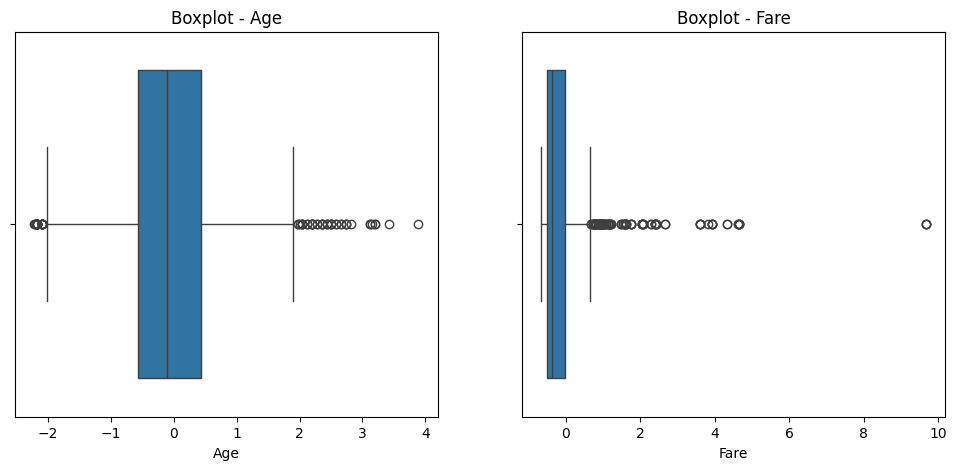

In [13]:
# Boxplots for 'Age' and 'Fare'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot - Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot - Fare')

plt.show()


Shape after outlier removal: (718, 9)


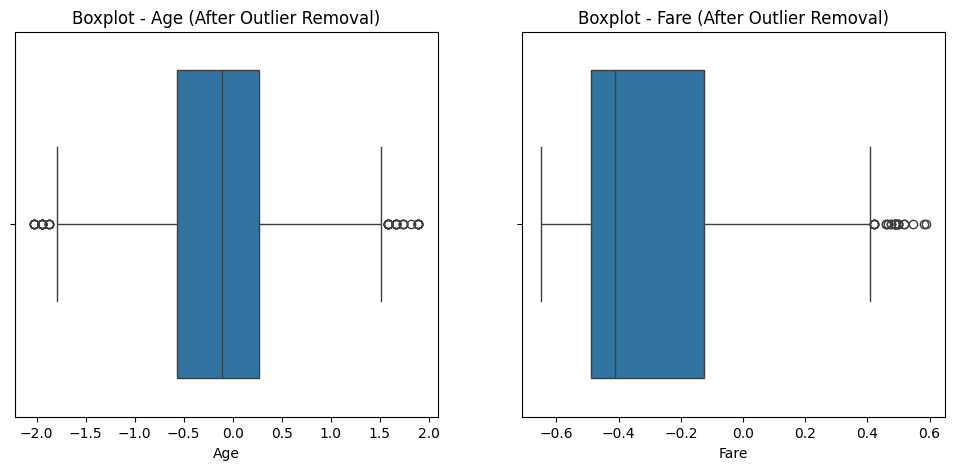

In [14]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

#Removing outliers
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')


print("Shape after outlier removal:", df.shape)

#Boxplot again to verify
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot - Age (After Outlier Removal)')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot - Fare (After Outlier Removal)')
plt.show()
